
<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://briansimulator.org/"><img src="http://briansimulator.org/WordPress/wp-content/ata-images/brian1.png" alt="The Brian spiking neural network simulator" title="The Brian spiking neural network simulator" width="200px" style="display: inline-block; margin-top: 5px;"></a>
<a href="http://mybinder.org/"><img src="https://raw.githubusercontent.com/jupyterhub/binderhub/master/binderhub/static/logo.svg" alt="binder logo" title="binder" width="375px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

### Quickstart
To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button
   (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

Feel free to create new cells using the plus button
(<button class='fa fa-plus icon-plus btn btn-xs btn-default'></button>), or pressing `SHIFT+ENTER` while this cell
is selected.
<div class="alert alert-block alert-warning" role="alert" style="margin: 10px">
<p><b>WARNING</b></p>
<p>Don't rely on this server for anything you want to last - your session will be
deleted after a short period of inactivity.</p>
</div>

This notebook is running on [mybinder.org](http://mybinder.org) created by the
[Freeman lab](https://www.janelia.org/lab/freeman-lab).



This is a Brian script implementing a benchmark described
in the following review paper:

Simulation of networks of spiking neurons: A review of tools and strategies
(2007). Brette, Rudolph, Carnevale, Hines, Beeman, Bower, Diesmann, Goodman,
Harris, Zirpe, Natschlager, Pecevski, Ermentrout, Djurfeldt, Lansner, Rochel,
Vibert, Alvarez, Muller, Davison, El Boustani and Destexhe.
Journal of Computational Neuroscience 23(3):349-98

Benchmark 2: random network of integrate-and-fire neurons with exponential
synaptic currents.

Clock-driven implementation with exact subthreshold integration
(but spike times are aligned to the grid).


<IPython.core.display.Javascript object>


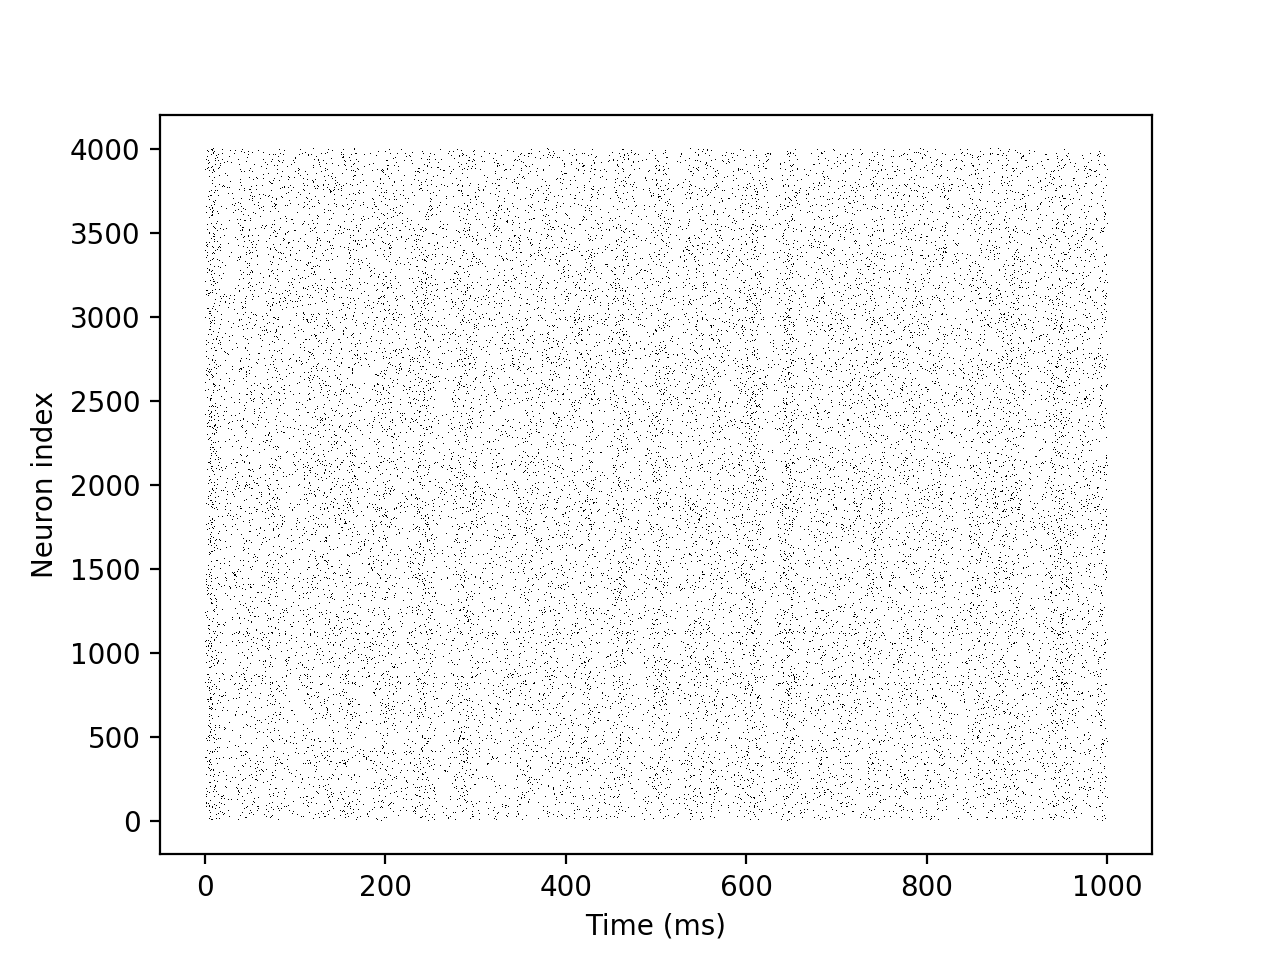

In [1]:
%matplotlib notebook
from brian2 import *
taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV
eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''
P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='exact')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV
we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)
s_mon = SpikeMonitor(P)
run(1 * second)
plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()